# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

## Work begins

In [2]:
import numpy as np
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, normaltest, anderson
from matplotlib import pyplot

init_notebook_mode(connected=True)

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### 1. Is the distribution of body temperatures normal? 

In [4]:
trace0 = go.Histogram(x=df.temperature, nbinsx=10)

iplot([trace0], filename='temp_hist.html')

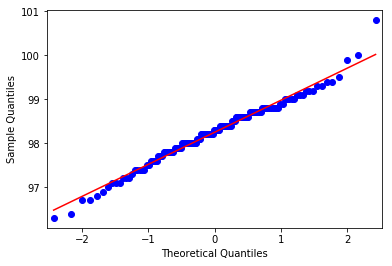

In [5]:
qqplot(df.temperature, line='s')
pyplot.show()

#### D’Agostino’s K-squared Test

In [6]:
stat, p = normaltest(df.temperature)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=2.704, p=0.259
Sample looks Gaussian (fail to reject H0)


#### Shapiro-Wilks Test

In [7]:
stat, p = shapiro(df.temperature)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.987, p=0.233
Sample looks Gaussian (fail to reject H0)


#### Anderson-Darling Test

In [8]:
result = anderson(df.temperature)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.520
15.000: 0.560, data looks normal (fail to reject H0)
10.000: 0.637, data looks normal (fail to reject H0)
5.000: 0.765, data looks normal (fail to reject H0)
2.500: 0.892, data looks normal (fail to reject H0)
1.000: 1.061, data looks normal (fail to reject H0)


#### Answer: Yes, the data is normal.

### 2. Is the sample size large? Are the observations independent? 

In [9]:
print('Number of samples: %s' % str(len(df)))

Number of samples: 130


The number of samples is >40. 

### Is the true population mean really 98.6 degrees F?
First, try a bootstrap hypothesis test.

Define the null hypothesis, alternative hypothesis, and the p-value threshhold. <br>
H0: xbar = 98.6 <br>
Ha: Xbar != 98.6 <br>
p=0.05

In [10]:
# shift the actual distribution so that the mean is
# actually exactly 98.6.
bootstrap = df.temperature - df.temperature.mean() + 98.6
bootstrap

0       99.650769
1       98.750769
2       98.150769
3       99.550769
4       98.350769
5       99.550769
6       98.350769
7       99.150769
8       98.750769
9       98.950769
10      99.150769
11      97.050769
12      98.550769
13      99.050769
14      98.150769
15      99.150769
16      98.650769
17      98.550769
18      97.550769
19      99.750769
20      98.650769
21      98.550769
22      98.950769
23      98.750769
24      98.150769
25      98.350769
26      98.150769
27      98.550769
28      98.750769
29      98.450769
          ...    
100     99.350769
101     98.850769
102     98.350769
103     99.750769
104     97.950769
105     97.050769
106     97.350769
107     98.950769
108     99.050769
109     97.650769
110     99.150769
111     98.350769
112     98.550769
113     99.450769
114     99.350769
115     98.350769
116    101.150769
117     98.150769
118     99.050769
119     98.750769
120     98.050769
121     98.250769
122     99.350769
123     97.550769
124     97

In [11]:
bootstrap.mean()

98.59999999999992

In [12]:
# we can see how this compares to the sample mean
df.temperature.mean()

98.24923076923078

In [13]:
trace0 = go.Histogram(x=bootstrap, nbinsx=20)

iplot([trace0], filename='boostrap_hist.html')

Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the 𝑡 or 𝑧 statistic?

Now try using the other test. How is the result be different? Why? 